In [1]:
import pandas as pd

# Load the datasets
applications_df = pd.read_csv('cleaned_applications.csv')
branches_df = pd.read_csv('cleaned_branches.csv')
customers_df = pd.read_csv('cleaned_customers.csv')
defaults_df = pd.read_csv('cleaned_defaults.csv')
loans_df = pd.read_csv('cleaned_loans.csv')
transactions_df = pd.read_csv('cleaned_transactions.csv')

print("Datasets loaded successfully.")

Datasets loaded successfully.


In [2]:
defaults_df['Default_Date'] = pd.to_datetime(defaults_df['Default_Date'])
display(defaults_df.head())

Default_ID  Loan_ID Customer_ID Default_Date  Default_Amount  \
0    D000001  L007312     C007312   2022-07-20           94480   
1    D000002  L028234     C028234   2023-09-23           10912   
2    D000003  L008319     C008319   2024-08-04           73711   
3    D000004  L046668     C046668   2021-10-16           48955   
4    D000005  L082934     C082934   2024-10-07           56952   

      Default_Reason Recovery_Status  Recovery_Amount Legal_Action  
0           Job Loss            Full            30360          Yes  
1           Job Loss         Partial                0          Yes  
2              Other  Not Applicable             9866          Yes  
3              Other  Not Applicable                0          Yes  
4  Medical Emergency  Not Applicable                0           No

In [3]:
defaults_df['Year'] = defaults_df['Default_Date'].dt.year
defaults_df['Month'] = defaults_df['Default_Date'].dt.month
display(defaults_df.head())

Default_ID  Loan_ID Customer_ID Default_Date  Default_Amount  \
0    D000001  L007312     C007312   2022-07-20           94480   
1    D000002  L028234     C028234   2023-09-23           10912   
2    D000003  L008319     C008319   2024-08-04           73711   
3    D000004  L046668     C046668   2021-10-16           48955   
4    D000005  L082934     C082934   2024-10-07           56952   

      Default_Reason Recovery_Status  Recovery_Amount Legal_Action  Year  \
0           Job Loss            Full            30360          Yes  2022   
1           Job Loss         Partial                0          Yes  2023   
2              Other  Not Applicable             9866          Yes  2024   
3              Other  Not Applicable                0          Yes  2021   
4  Medical Emergency  Not Applicable                0           No  2024   

   Month  
0      7  
1      9  
2      8  
3     10  
4     10

In [4]:
default_counts_over_time = defaults_df.groupby(['Year', 'Month']).size().reset_index(name='Default Count')
display(default_counts_over_time)

Year  Month  Default Count
0   2021      1            164
1   2021      2            171
2   2021      3            189
3   2021      4            196
4   2021      5            195
5   2021      6            181
6   2021      7            177
7   2021      8            192
8   2021      9            179
9   2021     10            171
10  2021     11            189
11  2021     12            191
12  2022      1            190
13  2022      2            163
14  2022      3            183
15  2022      4            199
16  2022      5            192
17  2022      6            186
18  2022      7            172
19  2022      8            179
20  2022      9            204
21  2022     10            194
22  2022     11            210
23  2022     12            216
24  2023      1            181
25  2023      2            169
26  2023      3            187
27  2023      4            207
28  2023      5            170
29  2023      6            173
30  2023      7            198
31  2023      8            176
32  2023      9            171
33  2023     10            195
34  2023     11            175
35  2023     12            176
36  2024      1            195
37  2024      2            168
38  2024      3            205
39  2024      4            194
40  2024      5            216
41  2024      6            194
42  2024      7            187
43  2024      8            187
44  2024      9            184
45  2024     10            209
46  2024     11            202
47  2024     12            191
48  2025      1              7

In [5]:
display(default_counts_over_time)

Year  Month  Default Count
0   2021      1            164
1   2021      2            171
2   2021      3            189
3   2021      4            196
4   2021      5            195
5   2021      6            181
6   2021      7            177
7   2021      8            192
8   2021      9            179
9   2021     10            171
10  2021     11            189
11  2021     12            191
12  2022      1            190
13  2022      2            163
14  2022      3            183
15  2022      4            199
16  2022      5            192
17  2022      6            186
18  2022      7            172
19  2022      8            179
20  2022      9            204
21  2022     10            194
22  2022     11            210
23  2022     12            216
24  2023      1            181
25  2023      2            169
26  2023      3            187
27  2023      4            207
28  2023      5            170
29  2023      6            173
30  2023      7            198
31  2023      8            176
32  2023      9            171
33  2023     10            195
34  2023     11            175
35  2023     12            176
36  2024      1            195
37  2024      2            168
38  2024      3            205
39  2024      4            194
40  2024      5            216
41  2024      6            194
42  2024      7            187
43  2024      8            187
44  2024      9            184
45  2024     10            209
46  2024     11            202
47  2024     12            191
48  2025      1              7

In [6]:
defaults_loans_df = pd.merge(defaults_df, loans_df, on='Loan_ID', how='inner')
display(defaults_loans_df.head())

Default_ID  Loan_ID Customer_ID_x Default_Date  Default_Amount  \
0    D000001  L007312       C007312   2022-07-20           94480   
1    D000002  L028234       C028234   2023-09-23           10912   
2    D000003  L008319       C008319   2024-08-04           73711   
3    D000004  L046668       C046668   2021-10-16           48955   
4    D000005  L082934       C082934   2024-10-07           56952   

      Default_Reason Recovery_Status  Recovery_Amount Legal_Action  Year  ...  \
0           Job Loss            Full            30360          Yes  2022  ...   
1           Job Loss         Partial                0          Yes  2023  ...   
2              Other  Not Applicable             9866          Yes  2024  ...   
3              Other  Not Applicable                0          Yes  2021  ...   
4  Medical Emergency  Not Applicable                0           No  2024  ...   

   Loan_Amount Interest_Rate  Loan_Term  Disbursal_Date  Repayment_Start_Date  \
0      3830000          9.07         12      2022-07-08            2022-08-08   
1      1760443         12.51         60      2023-10-24            2023-11-24   
2      2388961         10.78         36      2022-01-25            2022-02-25   
3      3033645         11.44         12      2023-09-18            2023-10-18   
4      4667765         10.30         48      2024-08-06            2024-09-06   

  Repayment_End_Date Loan_Status Overdue_Amount EMI_Amount  Collateral_Details  
0         2023-07-08      Active          44605      20902            Property  
1         2028-10-24      Closed              0      96725            Property  
2         2025-01-25     Overdue              0      78109      Not Applicable  
3         2024-09-18      Active              0      13609      Not Applicable  
4         2028-08-06      Active          47466      41827      Not Applicable  

[5 rows x 22 columns]

In [7]:
defaults_applications_df = pd.merge(defaults_df, applications_df[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='inner')
average_default_amount_by_purpose = defaults_applications_df.groupby('Loan_Purpose')['Default_Amount'].mean().reset_index()
display(average_default_amount_by_purpose)

Loan_Purpose  Default_Amount
0         Business    53261.031433
1        Education    53797.758769
2  Home Renovation    53038.080028
3         Personal    52389.399011
4          Vehicle    52671.599578

In [8]:
defaults_loans_df = pd.merge(defaults_df, loans_df, on='Loan_ID', how='inner')
display(defaults_loans_df.head())

Default_ID  Loan_ID Customer_ID_x Default_Date  Default_Amount  \
0    D000001  L007312       C007312   2022-07-20           94480   
1    D000002  L028234       C028234   2023-09-23           10912   
2    D000003  L008319       C008319   2024-08-04           73711   
3    D000004  L046668       C046668   2021-10-16           48955   
4    D000005  L082934       C082934   2024-10-07           56952   

      Default_Reason Recovery_Status  Recovery_Amount Legal_Action  Year  ...  \
0           Job Loss            Full            30360          Yes  2022  ...   
1           Job Loss         Partial                0          Yes  2023  ...   
2              Other  Not Applicable             9866          Yes  2024  ...   
3              Other  Not Applicable                0          Yes  2021  ...   
4  Medical Emergency  Not Applicable                0           No  2024  ...   

   Loan_Amount Interest_Rate  Loan_Term  Disbursal_Date  Repayment_Start_Date  \
0      3830000          9.07         12      2022-07-08            2022-08-08   
1      1760443         12.51         60      2023-10-24            2023-11-24   
2      2388961         10.78         36      2022-01-25            2022-02-25   
3      3033645         11.44         12      2023-09-18            2023-10-18   
4      4667765         10.30         48      2024-08-06            2024-09-06   

  Repayment_End_Date Loan_Status Overdue_Amount EMI_Amount  Collateral_Details  
0         2023-07-08      Active          44605      20902            Property  
1         2028-10-24      Closed              0      96725            Property  
2         2025-01-25     Overdue              0      78109      Not Applicable  
3         2024-09-18      Active              0      13609      Not Applicable  
4         2028-08-06      Active          47466      41827      Not Applicable  

[5 rows x 22 columns]

In [9]:
defaults_loans_customers_df = pd.merge(defaults_loans_df, customers_df, left_on='Customer_ID_x', right_on='Customer_ID', how='inner')
display(defaults_loans_customers_df.head())

Default_ID  Loan_ID Customer_ID_x Default_Date  Default_Amount  \
0    D000001  L007312       C007312   2022-07-20           94480   
1    D000002  L028234       C028234   2023-09-23           10912   
2    D000003  L008319       C008319   2024-08-04           73711   
3    D000004  L046668       C046668   2021-10-16           48955   
4    D000007  L039073       C039073   2022-09-06           73374   

  Default_Reason Recovery_Status  Recovery_Amount Legal_Action  Year  ...  \
0       Job Loss            Full            30360          Yes  2022  ...   
1       Job Loss         Partial                0          Yes  2023  ...   
2          Other  Not Applicable             9866          Yes  2024  ...   
3          Other  Not Applicable                0          Yes  2021  ...   
4          Other         Partial            16247          Yes  2022  ...   

                             Address Age  Gender  Marital_Status  \
0   94/709\nUppal Path\nSikar-965010  30    Male          Single   
1  69/381, Krishnan\nChittoor-900585  36  Female          Single   
2        69/761\nGoyal, Arrah-626737  54  Female          Single   
3   60, Luthra Circle\nKarnal 384663  20  Female         Married   
4  699, Handa Road, Kamarhati-680520  21    Male          Single   

   Employment_Status Annual_Income Credit_Score     Region Account_Tenure  \
0         Unemployed        268159          798  Northeast              1   
1           Salaried        235692          791       East              6   
2           Salaried       1360150          655      South             15   
3           Salaried       1063562          523      South              4   
4           Salaried        275622          441      North             11   

   Relationship_Manager_ID  
0                   RM0116  
1                   RM0377  
2                   RM0341  
3                   RM0230  
4                   RM0208  

[5 rows x 36 columns]

In [10]:
display(defaults_loans_customers_df['Annual_Income'].describe())

count    7.014000e+03
mean     1.106687e+06
std      5.194871e+05
min      2.000910e+05
25%      6.590282e+05
50%      1.107950e+06
75%      1.561162e+06
max      1.999487e+06
Name: Annual_Income, dtype: float64

In [11]:
income_quartiles = defaults_loans_customers_df['Annual_Income'].quantile([0.25, 0.5, 0.75])
low_income_threshold = income_quartiles[0.25]
medium_income_threshold = income_quartiles[0.5]
high_income_threshold = income_quartiles[0.75]

def categorize_income(income):
    if income <= low_income_threshold:
        return 'Low'
    elif income <= medium_income_threshold:
        return 'Medium'
    elif income <= high_income_threshold:
        return 'High'
    else:
        return 'Very High'

defaults_loans_customers_df['Income_Category'] = defaults_loans_customers_df['Annual_Income'].apply(categorize_income)

display(defaults_loans_customers_df['Income_Category'].value_counts())

Income_Category
Low          1754
Very High    1754
High         1753
Medium       1753
Name: count, dtype: int64

In [12]:
customers_df['Income_Category'] = customers_df['Annual_Income'].apply(categorize_income)
display(customers_df.head())

Customer_ID      Full_Name  Contact_Number  \
0     C000001   Shayak Kumar      1549750578   
1     C000002    Divij Ghosh      2121540709   
2     C000003  Rhea Bhargava    910320534937   
3     C000004  Indrans Walia      6566372162   
4     C000005    Saanvi Chad      9281095585   

                              Email                                  Address  \
0  saxenaindrans@gopal-krishnan.com  27/062\nSangha Nagar, Bongaigaon 736150   
1           ramanindranil@tella.com   H.No. 20, Edwin Circle\nKatihar 892167   
2             bahlelakshi@mall.info       67/386\nComar Nagar, Chapra 137669   
3                akadakia@yahoo.com      88\nDhillon Ganj\nJamshedpur-816278   
4               arhaan11@master.net        011, Kunda Marg\nHyderabad-505161   

   Age  Gender Marital_Status Employment_Status  Annual_Income  Credit_Score  \
0   53    Male         Single        Unemployed         886810           433   
1   62  Female         Single     Self-Employed         396746           418   
2   62   Other         Single     Self-Employed        1118591           736   
3   59  Female         Single          Salaried         524075           353   
4   56    Male         Single     Self-Employed        1219355           735   

      Region  Account_Tenure Relationship_Manager_ID Income_Category  
0      North              12                  RM0015          Medium  
1       West              10                  RM0276             Low  
2  Northeast               9                  RM0098            High  
3    Central              11                  RM0231             Low  
4       West               1                  RM0107            High

In [13]:
default_counts_by_income = defaults_loans_customers_df.groupby('Income_Category').size().reset_index(name='Default Count')
display(default_counts_by_income)

Income_Category  Default Count
0            High           1753
1             Low           1754
2          Medium           1753
3       Very High           1754

In [14]:
loans_customers_df = pd.merge(loans_df, customers_df, on='Customer_ID', how='inner')
total_loan_counts = loans_customers_df.groupby('Income_Category').size().reset_index(name='Total Loan Count')
display(total_loan_counts)

Income_Category  Total Loan Count
0            High             22663
1             Low             22991
2          Medium             22407
3       Very High             21939

In [15]:
income_default_analysis_df = pd.merge(default_counts_by_income, total_loan_counts, on='Income_Category', how='inner')
display(income_default_analysis_df.head())

Income_Category  Default Count  Total Loan Count
0            High           1753             22663
1             Low           1754             22991
2          Medium           1753             22407
3       Very High           1754             21939

In [16]:
income_default_analysis_df['Default Rate'] = income_default_analysis_df['Default Count'] / income_default_analysis_df['Total Loan Count']
display(income_default_analysis_df)

Income_Category  Default Count  Total Loan Count  Default Rate
0            High           1753             22663      0.077351
1             Low           1754             22991      0.076291
2          Medium           1753             22407      0.078234
3       Very High           1754             21939      0.079949

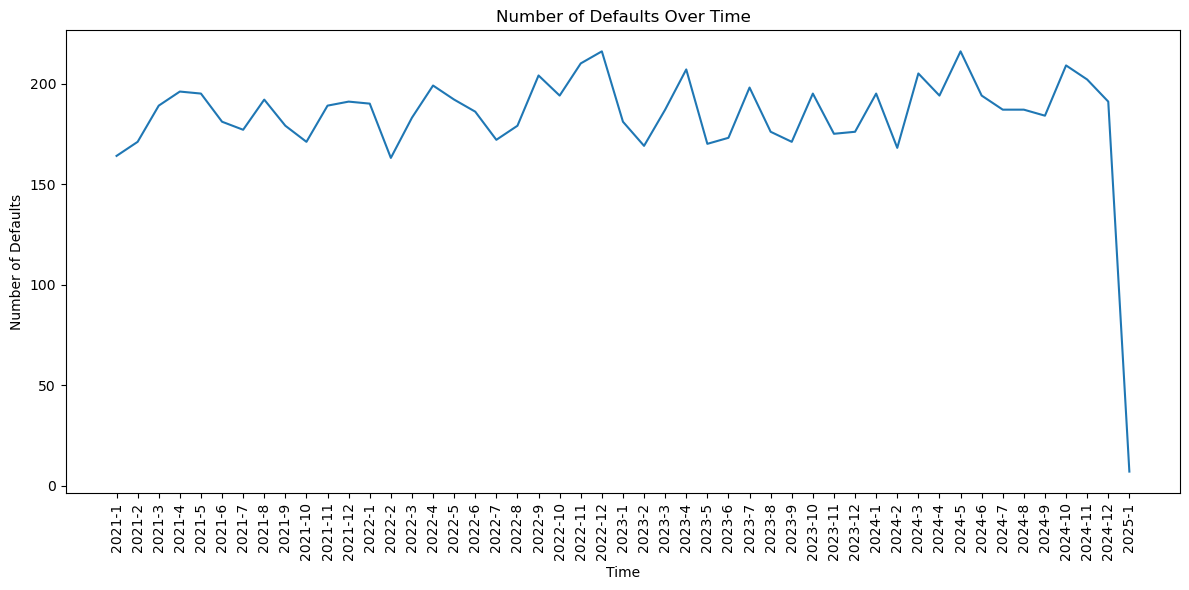

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(default_counts_over_time['Year'].astype(str) + '-' + default_counts_over_time['Month'].astype(str), default_counts_over_time['Default Count'])
plt.xlabel('Time')
plt.ylabel('Number of Defaults')
plt.title('Number of Defaults Over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

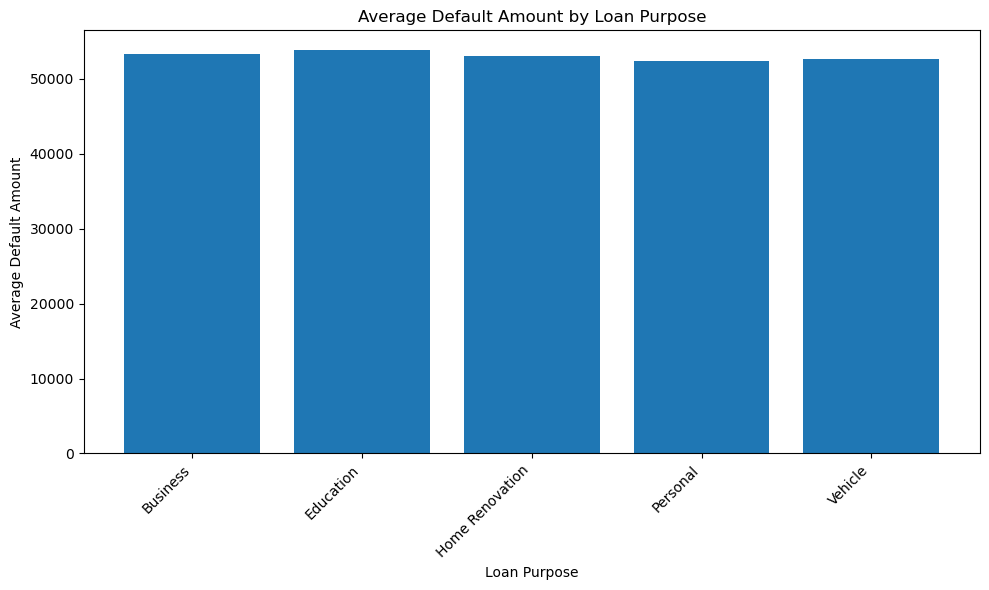

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(average_default_amount_by_purpose['Loan_Purpose'], average_default_amount_by_purpose['Default_Amount'])
plt.xlabel('Loan Purpose')
plt.ylabel('Average Default Amount')
plt.title('Average Default Amount by Loan Purpose')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

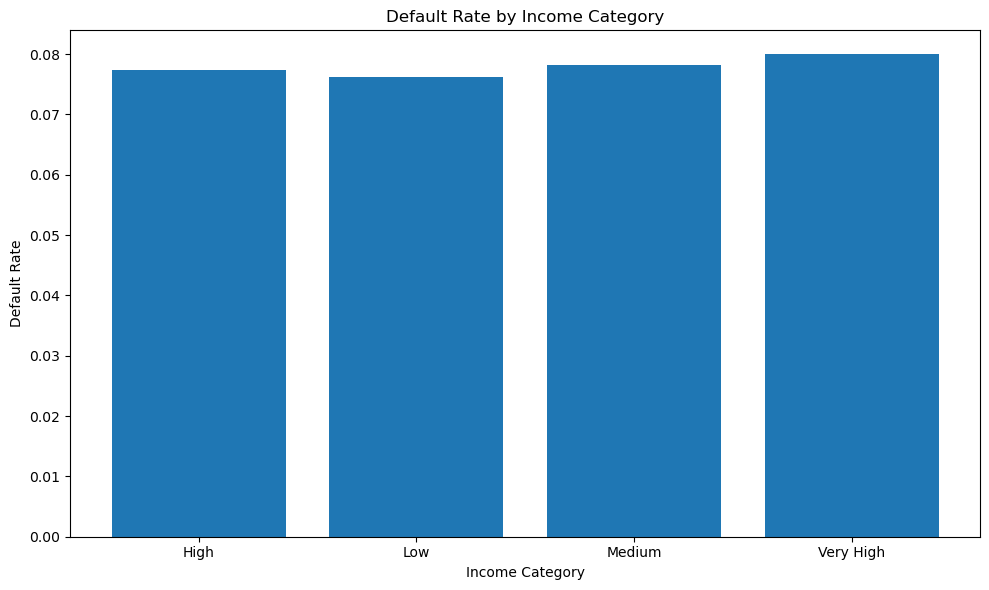

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(income_default_analysis_df['Income_Category'], income_default_analysis_df['Default Rate'])
plt.xlabel('Income Category')
plt.ylabel('Default Rate')
plt.title('Default Rate by Income Category')
plt.tight_layout()
plt.show()